# <center>________________________________________________________________</center>

# <center>LANDING PREDICTION FOR THE SPACEX FALCON 9 ROCKET</center>

# <center>Part 3 - Exploratory Data Analysis with Visualization</center>

# <center>________________________________________________________________</center>

# Introduction
***

In this project, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of \\$62 million; other providers cost upward of \\$165 million each, much of the savings is because SpaceX can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against SpaceX for a rocket launch.

In this part, we will perform Exploratory Data Analysis with Data Visualization.

# Libraries
***

In [ ]:
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install seaborn

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Data Acquisation
***

First, we will read the SpaceX dataset that we wrangled into a dataframe and print its summary:

In [2]:
df=pd.read_csv("https://github.com/efeyemez/Portfolio/raw/main/Datasets/SpaceX_Falcon_9/falcon9_wrangled.csv")

print(df.shape)
df.head(5)

(167, 18)


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,8184.0,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


# EXPLORATORY DATA ANALYSIS WITH VISUALIZATION
***

# Flight Number vs. Payload Mass
***

First, we will try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome. We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch.

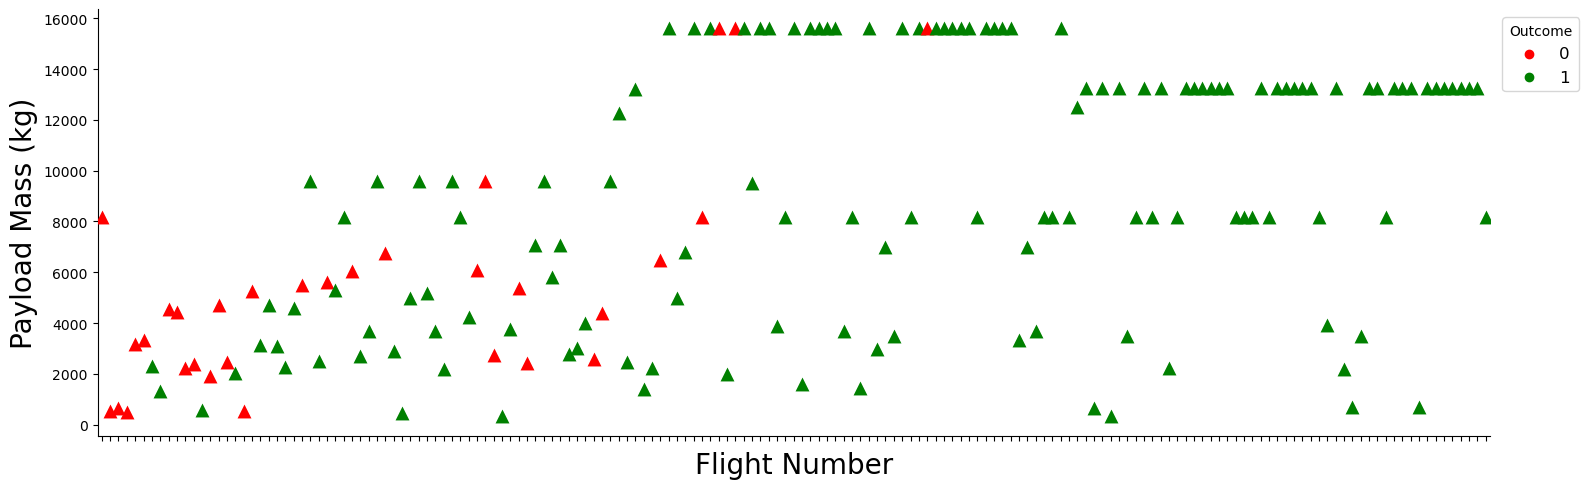

In [3]:
fig = sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, s = 100, marker="^", aspect = 3,
                  palette=sns.color_palette(['red', 'green']))

plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Payload Mass (kg)", fontsize=20)
fig.set_xticklabels([])

# Formatting the legend
fig._legend.remove()
plt.legend(title="Outcome", prop={'size': 12}, bbox_to_anchor=(1.07, 1), loc='upper right')

plt.show()

We see that as the flight number increases, the first stage is more likely to land successfully.

# Launch Sites
***

The data contains several SpaceX  launch facilities:<br>

Cape Canaveral Space Force Station, Space Launch Complex 40 <b>(CCSFS SLC 40)</b><br>
Kennedy Space Center, Launch Complex 39A <b>(KSC LC 39A)</b><br>
Vandenberg Air Force Base, Space Launch Complex 4 <b>(SLC-4E)</b><br>

The location of each Launch Is placed in the column <code>LaunchSite</code>.

In [4]:
# Determine the number of launches on each site
df[["LaunchSite"]].value_counts()

LaunchSite  
CCSFS SLC 40    93
KSC LC 39A      48
VAFB SLC 4E     26
dtype: int64

We see that different launch sites have different success rates:

In [5]:
df_site1 = df[df["LaunchSite"]=="CCSFS SLC 40"][["Class"]]
df_site2 = df[df["LaunchSite"]=="VAFB SLC 4E"][["Class"]]
df_site3 = df[df["LaunchSite"]=="KSC LC 39A"][["Class"]]


print("The success Rate of CCSFS SLC 40: is %.3f%%" % (100*df_site1.mean()))
print("The success Rate of VAFB SLC 4E: is %.3f%%" % (100*df_site2.mean()))
print("The success Rate of KSC LC 39A: is %.3f%%" % (100*df_site3.mean()))

The success Rate of CCSFS SLC 40: is 75.269%
The success Rate of VAFB SLC 4E: is 88.462%
The success Rate of KSC LC 39A: is 89.583%


We can see this on a bar chart:

    Launch Site  Success Rate(%)
0  CCSFS SLC 40            75.27
1    KSC LC 39A            89.58
2   VAFB SLC 4E            88.46


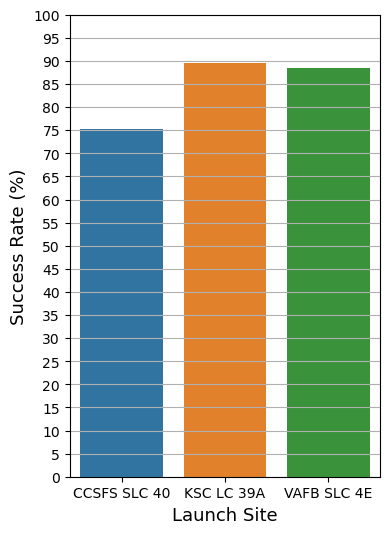

In [6]:
success_rates = df[["LaunchSite", "Class"]].groupby("LaunchSite", as_index = False).mean()
success_rates.columns = ["Launch Site", "Success Rate(%)"]
success_rates["Success Rate(%)"] = round(success_rates["Success Rate(%)"]*100, 2)
print(success_rates)


plt.figure(figsize=(4, 6))  # Adjust the width and height as desired

fig = sns.barplot(x ="Launch Site", y="Success Rate(%)", data=success_rates)

plt.xlabel("Launch Site", fontsize=13)
plt.ylabel("Success Rate (%)", fontsize=13)

plt.grid(axis='y')
plt.yticks(range(0, 101, 5))

plt.show()

# Flight Number vs. Launch Site
***

For each launch site, we want to see if there is any relationship between flight number and success rate:

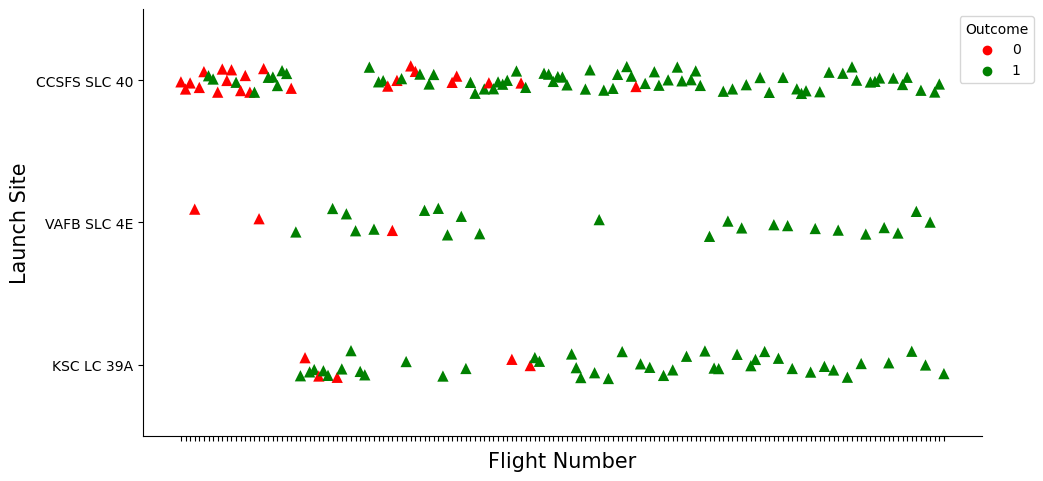

In [7]:
# Scatter plot
fig = sns.catplot(x="FlightNumber", y="LaunchSite", data=df, hue="Class", s = 66, marker="^", aspect = 2,
                  palette=sns.color_palette(['red', 'green']))

plt.xlabel("Flight Number", fontsize=15)
plt.ylabel("Launch Site", fontsize=15)

plt.xticks(range(df["FlightNumber"].min(), df["FlightNumber"].max() + 1, 1))
fig.set_xticklabels([])

# Formatting the legend
fig._legend.remove()
plt.legend(title="Outcome", prop={'size': 10}, bbox_to_anchor=(1.07, 1), loc='upper right')

plt.show()

# Payload Mass vs. Launch Site
***

We also want to observe if there is any relationship between launch sites and their payload mass.


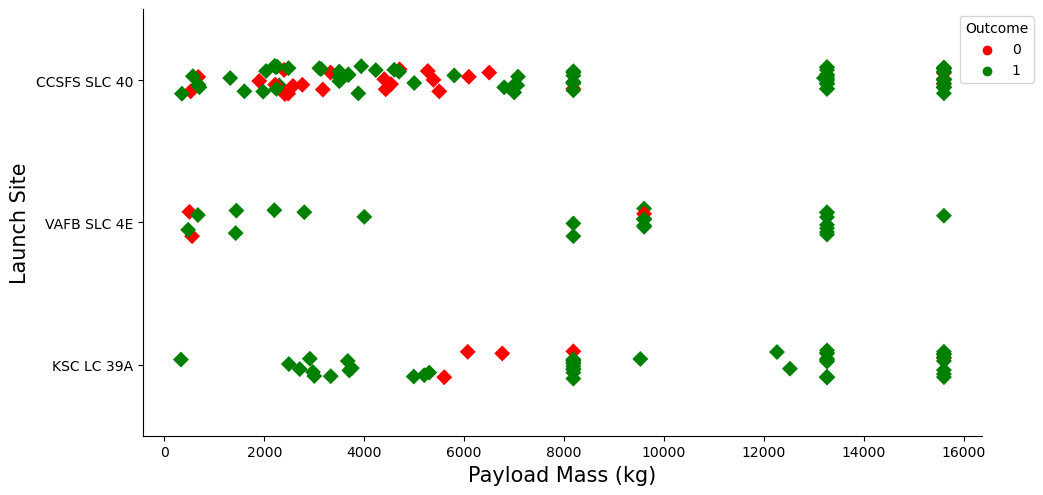

In [8]:
# Scatter plot
fig = sns.catplot(x ="PayloadMass", y="LaunchSite", hue="Class", data=df, s = 66, marker="D", aspect = 2,
                  palette=sns.color_palette(['red', 'green']))

plt.xlabel("Payload Mass (kg)", fontsize=15)
plt.ylabel("Launch Site", fontsize=15)

# Formatting the legend
fig._legend.remove()
plt.legend(title="Outcome", prop={'size': 10}, bbox_to_anchor=(1.07, 1), loc='upper right')

plt.show()

Now if we observe the scatter plot, we see that higher payload mass yields better results for every launch site.

# Orbit Type
***

Each launch aims to a dedicated orbit:

*   [<b>VLEO</b>](https://en.wikipedia.org/wiki/Very_low_Earth_orbit)

*   [<b> ISS </b>](https://en.wikipedia.org/wiki/International_Space_Station)

*   [<b>GTO</b>](https://en.wikipedia.org/wiki/Geostationary_transfer_orbit)

*   [<b>LEO</b>](https://en.wikipedia.org/wiki/Low_Earth_orbit)

*   [<b> PO </b>](https://en.wikipedia.org/wiki/Polar_orbit)

*   [<b>SSO (or SO)</b>](https://en.wikipedia.org/wiki/Sun-synchronous_orbit)

*   [<b> MEO </b>](https://en.wikipedia.org/wiki/Medium_Earth_orbit)

*   [<b> GEO </b>](https://en.wikipedia.org/wiki/Geostationary_orbit)

*   [<b> TLI </b>](https://en.wikipedia.org/wiki/Trans-lunar_injection)

*   [<b>ES-L1 </b>](https://en.wikipedia.org/wiki/Lagrange_point)

*   [<b>HEO</b>](https://en.wikipedia.org/wiki/Highly_elliptical_orbit)

In [9]:
# Determine the number and occurrence of each orbit
df[["Orbit"]].value_counts()

Orbit
VLEO     54
ISS      32
GTO      31
LEO      14
PO       13
SSO      12
MEO       5
GEO       2
TLI       2
ES-L1     1
HEO       1
dtype: int64

Next, we want to visually check if there are any relationship between success rate and orbit type.


   Orbit Type  Success Rate(%)
0       ES-L1           100.00
1         GEO           100.00
2         GTO            58.06
3         HEO           100.00
4         ISS            75.00
5         LEO            85.71
6         MEO            80.00
7          PO            76.92
8         SSO            91.67
9         TLI           100.00
10       VLEO            94.44


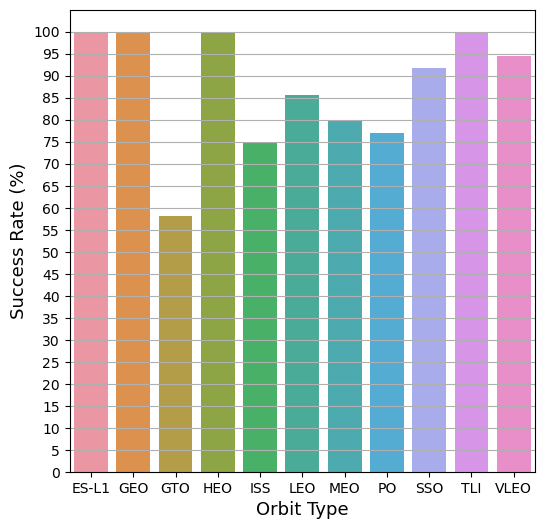

In [10]:
success_rates = df[["Orbit", "Class"]].groupby("Orbit", as_index = False).mean()
success_rates.columns = ["Orbit Type", "Success Rate(%)"]
success_rates["Success Rate(%)"] = round(success_rates["Success Rate(%)"]*100, 2)
print(success_rates)


plt.figure(figsize=(6, 6))  # Adjust the width and height as desired

fig = sns.barplot(x ="Orbit Type", y="Success Rate(%)", data=success_rates)

plt.xlabel("Orbit Type", fontsize=13)
plt.ylabel("Success Rate (%)", fontsize=13)

plt.grid(axis='y')
plt.yticks(range(0, 101, 5))

plt.show()

# Flight Number vs. Orbit Type
***

For each orbit, we want to see if there is any relationship between flight number and success rate:

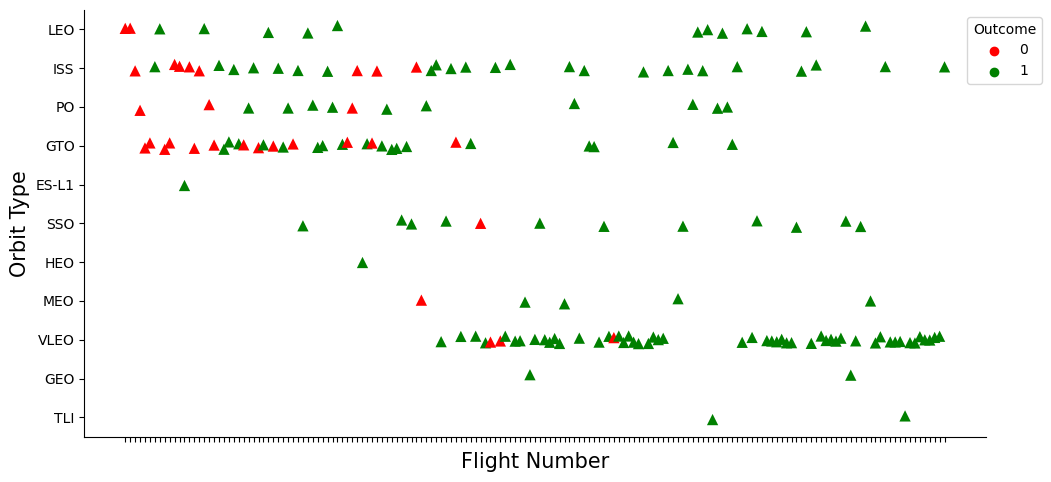

In [11]:
# Scatter plot
fig = sns.catplot(x="FlightNumber", y="Orbit", hue="Class", data = df, s = 66, marker="^", aspect = 2,
                  palette=sns.color_palette(['red', 'green']))

plt.xlabel("Flight Number", fontsize=15)
plt.ylabel("Orbit Type", fontsize=15)

plt.xticks(range(df["FlightNumber"].min(), df["FlightNumber"].max() + 1, 1))
fig.set_xticklabels([])

# Formatting the legend
fig._legend.remove()
plt.legend(title="Outcome", prop={'size': 10}, bbox_to_anchor=(1.07, 1), loc='upper right')

plt.show()

In every orbit that has failures, we see that correlation between flight number and success rate is still present.

# Payload Mass vs. Orbit Type
***

Similarly, we can plot the Payload vs. Orbit scatter plot chart to reveal the relationship between Payload and Orbit type:

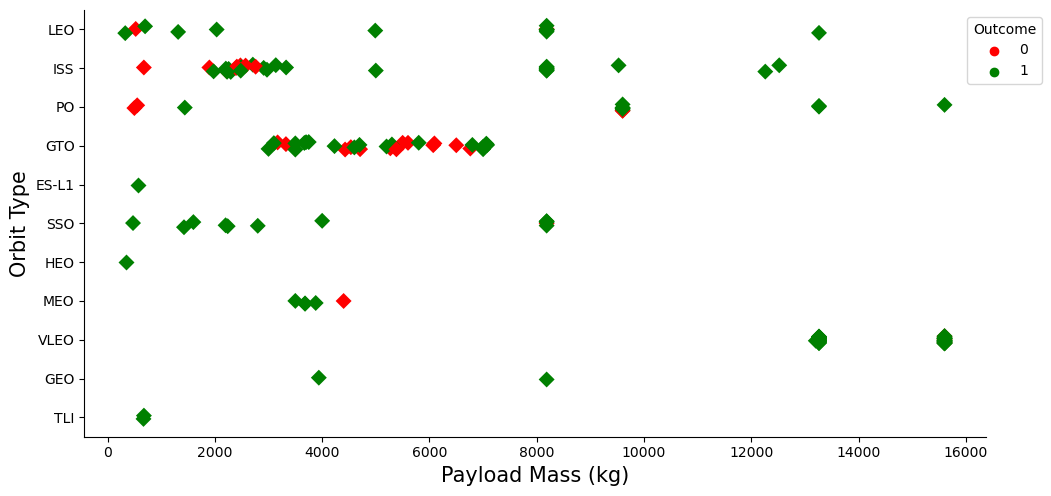

In [12]:
# Scatter plot
fig = sns.catplot(x="PayloadMass", y="Orbit", hue="Class", data=df, s = 66, marker="D", aspect = 2,
                  palette=sns.color_palette(['red', 'green']))

plt.xlabel("Payload Mass (kg)", fontsize=15)
plt.ylabel("Orbit Type", fontsize=15)

# Formatting the legend
fig._legend.remove()
plt.legend(title="Outcome", prop={'size': 10}, bbox_to_anchor=(1.07, 1), loc='upper right')

plt.show()

With heavier payloads, the success rate gets better for LEO, ISS, and PO.

However, for GTO, we cannot distinguish this well because both successful and unsuccessful landings are present.

For MEO, it seems success rate gets worse with heavier payloads. However, there are only small number of data in that orbit so this conlcusion might not be that accurate.

# Yearly Trend
***

We can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the launch success trend.

In [13]:
# A function to Extract years from the date 

def Extract_year(date):
    year=[]
    for i in date:
        year.append(i.split("-")[0])
    return year
    

In [14]:
years=[]
years = Extract_year(df["Date"])

print(len(years))

df_years = df.copy()
df_years["Year"]=years
df_years.head(5)

167


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year
0,1,2010-06-04,Falcon 9,8184.0,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,2010
1,2,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,2012
2,3,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,2013
3,4,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,2013
4,5,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,2013


In [15]:
success_rates_years = df_years[["Year", "Class"]].groupby("Year", as_index = False).mean()
success_rates_years["Class"] *= 100
success_rates_years

,Year,Class
0,2010,0.000000
1,2012,0.000000
2,2013,0.000000
3,2014,33.333333
4,2015,33.333333
5,2016,62.500000
6,2017,83.333333
7,2018,61.111111
8,2019,90.000000
9,2020,87.500000


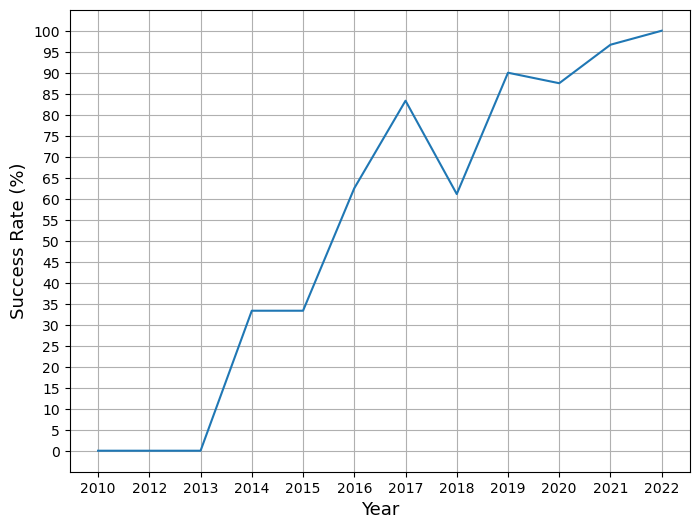

In [16]:
# Line chart
plt.figure(figsize=(8, 6))  # Adjust the width and height as desired

fig = sns.lineplot(x="Year", y="Class", data=success_rates_years)

plt.xlabel("Year", fontsize=13)
plt.ylabel("Success Rate (%)", fontsize=13)

plt.grid(True)
plt.yticks(range(0, 101, 5))

plt.show()

We can observe that the sucess rate kept increasing between 2013 and 2017. After a dramatic drop in 2018, it surpassed the previous success rate in 2019 and kept increasing afterwards.

# <center>________________________________________________________________</center>